# MetaChest Exploration

In [1]:
from os import makedirs
from os.path import join

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import EngFormatter

from common import read_toml

In [2]:
keywords = {
    'dataset': 'Dataset',
    'chestxray14': 'ChestX-ray14',
    'chexpert': 'CheXpert',
    'metachest': 'MetaChest',
    'mimic': 'MIMIC',
    'padchest': 'PadChest',
    'mtrn': 'Meta-Train',
    'mval': 'Meta-Validation',
    'mtst': 'Meta-Test',
    'atelectasis': 'Atelectasis',
    'cardiomegaly': 'Cardiomegaly',
    'consolidation': 'Consolidation',
    'edema': 'Edema',
    'effusion': 'Effusion',
    'emphysema': 'Emphysema',
    'fibrosis': 'Fibrosis',
    'hernia': 'Hernia',
    'infiltration': 'Infiltration',
    'lung_opacity': 'Lung opacity',
    'mass': 'Mass',
    'nodule': 'Nodule',
    'pleural_thickening': 'Pleural thickening',
    'pneumonia': 'Pneumonia',
    'pneumothorax': 'Pneumothorax',
    'total': 'Total',
}

plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{cmbright}',
    'text.usetex': True,
    'font.family': 'serif',
})
color = sns.color_palette('deep')

metachest_dir = read_toml('config.toml')['metachest_dir']
plot_dir = join(metachest_dir, 'plots')
makedirs(plot_dir, exist_ok=True)

## General

In [3]:
df = pd.read_csv(join(metachest_dir, 'metachest.csv'))
df.head(10)

,dataset,name,age,sex,view,atelectasis,cardiomegaly,consolidation,edema,effusion,emphysema,fibrosis,hernia,infiltration,lung_opacity,mass,nodule,pleural_thickening,pneumonia,pneumothorax
0,chestxray14,00000001_000,57,m,pa,0,1,0,0,0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0
1,chestxray14,00000001_001,58,m,pa,0,1,0,0,0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0
2,chestxray14,00000001_002,58,m,pa,0,1,0,0,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0
3,chestxray14,00000003_001,74,f,pa,0,0,0,0,0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0,0
4,chestxray14,00000003_002,75,f,pa,0,0,0,0,0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0,0
5,chestxray14,00000003_003,76,f,pa,0,0,0,0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0,0,0
6,chestxray14,00000003_004,77,f,pa,0,0,0,0,0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0,0
7,chestxray14,00000003_005,78,f,pa,0,0,0,0,0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0,0
8,chestxray14,00000003_006,79,f,pa,0,0,0,0,0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0,0
9,chestxray14,00000003_007,80,f,pa,0,0,0,0,0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0,0


General stats:

In [4]:
PATHOLOGIES = sorted(list(df.columns[5:]))
cols_order = ['metachest', 'chexpert', 'mimic', 'chestxray14', 'padchest']

labels_df = df[PATHOLOGIES].fillna(0).astype(int)
n_samples = labels_df.shape[0]
n_labels = labels_df.sum().sum()
label_cardinality = n_labels / n_samples
label_density = (labels_df.sum(axis=1) / labels_df.shape[1]).sum() / n_samples
print(
    f"Number of samples:\t {n_samples}",
    f"Number of labels:\t {n_labels}",
    f"Label cadinality:\t {label_cardinality}",
    f"Label density:\t\t {label_density}",
    sep='\n'
)
print('\nImages per dataset:')
df.groupby('dataset').count()['name']

Number of samples:	 322475
Number of labels:	 596494
Label cadinality:	 1.8497371889293743
Label density:		 0.12331581259529159

Images per dataset:


dataset
chestxray14     50651
chexpert       130930
mimic          111869
padchest        29025
Name: name, dtype: int64

Compute total dataframe:

In [5]:
# group by dataset
ds_sum_df = df[['dataset'] + PATHOLOGIES].groupby('dataset').sum().astype(int)
# sorted pathologies and datasets sseries
ds_sum_sr = ds_sum_df.sum(axis=1).sort_values(ascending=False)
pt_sum_sr = ds_sum_df.sum(axis=0).sort_values(ascending=False)
# sort grouped df
ds_sum_df = ds_sum_df.reindex(list(ds_sum_sr.index))
ds_sum_df = ds_sum_df[list(pt_sum_sr.index)]

# total df
total_df = ds_sum_df.copy()
total_df.loc[:, 'total'] = total_df.sum(axis=1)
total_df.loc['metachest', :] = total_df.sum(axis=0)
total_df = total_df.astype(int)
total_df.T[cols_order].rename(index=keywords, columns=keywords).replace(0, '').style.format(thousands=',')


dataset,MetaChest,CheXpert,MIMIC,ChestX-ray14,PadChest
Effusion,"128,189","66,484","43,544","13,086","5,075"
Lung opacity,"119,973","77,194","42,779",,
Atelectasis,"80,420","25,980","38,297","11,335","4,808"
Cardiomegaly,"66,386","20,391","36,512","2,701","6,782"
Edema,"66,275","41,247","21,894","2,269",865
Infiltration,"29,817",,,"19,362","10,455"
Pneumothorax,"29,718","14,977","9,215","5,220",306
Consolidation,"25,225","10,340","9,183","4,505","1,197"
Pneumonia,"21,594","2,986","13,679","1,381","3,548"
Nodule,"9,667",,,"6,238","3,429"


Distribution plot:

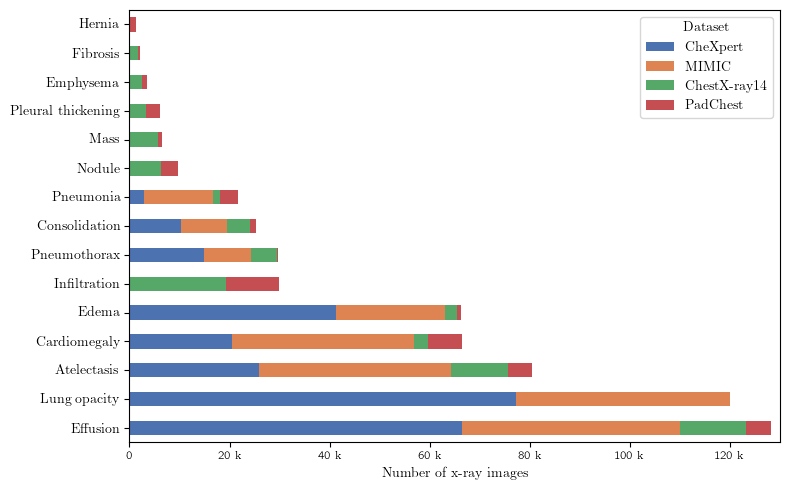

In [6]:
def plot_general(ds_sum_df):
    df_plot = ds_sum_df.T
    df_plot = df_plot.rename(index=keywords, columns=keywords)
    ax = df_plot.plot.barh(stacked=True, figsize=(8, 5),
                           color=color)
    ax.xaxis.set_major_formatter(EngFormatter())
    ax.set_xlabel('Number of x-ray images')
    ax.set_xlim(0, 130000)
    ax.xaxis.set_tick_params(labelsize='small')
    ax.yaxis.set_tick_params(labelsize='medium')
    ax.legend(title='Dataset', fontsize='medium')

    plt.tight_layout()
    plt.savefig(join(plot_dir, 'metachest_general.pdf'))
    plt.savefig(join(plot_dir, 'metachest_general.jpg'))

plot_general(ds_sum_df)

Pathology co-ocurrence matrix.

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Lung opacity,Mass,Nodule,Pleural thickening,Pneumonia,Pneumothorax
Atelectasis,80420,15342,4735,12894,35876,480,232,103,4113,21924,801,748,625,3741,5897
Cardiomegaly,15342,66386,3427,18561,24552,52,118,150,1582,18722,130,279,297,3168,2141
Consolidation,4735,3427,25225,4607,11844,125,77,7,2369,5688,615,463,257,3205,1323
Edema,12894,18561,4607,66275,32569,30,9,3,1616,27399,132,132,69,3433,1889
Effusion,35876,24552,11844,32569,128189,423,195,36,6079,54390,1324,1084,953,5533,9548
Emphysema,480,52,125,30,423,3423,44,7,604,0,232,179,241,76,772
Fibrosis,232,118,77,9,195,44,2139,15,621,0,118,189,223,29,80
Hernia,103,150,7,3,36,7,15,1231,86,0,80,54,54,13,4
Infiltration,4113,1582,2369,1616,6079,604,621,86,29817,0,1235,1981,1028,3061,976
Lung opacity,21924,18722,5688,27399,54390,0,0,0,0,119973,0,0,0,9000,9043


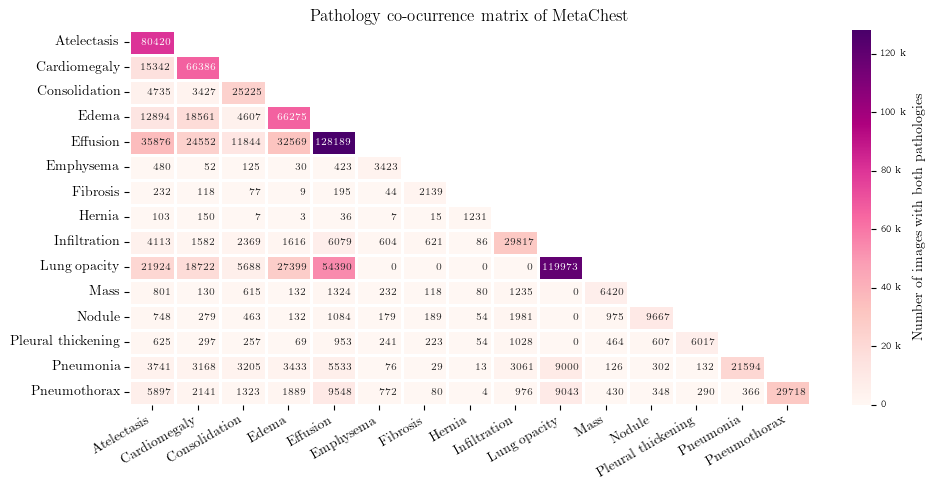

In [7]:
def plot_coocc(df):
    import matplotlib.transforms as mtransforms
    import numpy as np
    from matplotlib.ticker import EngFormatter

    df = df.iloc[:, 5:]
    df = df.fillna(0).astype(int)
    df_mat = df.to_numpy()
    coocc_mat = df_mat.T.dot(df_mat)

    paths = [keywords[p] for p in df.columns]
    coocc = pd.DataFrame(coocc_mat, index=paths, columns=paths)
    mask = np.triu(coocc+1, k=1)

    fig, ax = plt.subplots(figsize=(10, 5))
    trans_offset = mtransforms.offset_copy(ax.transData, fig=fig, x=0.18)

    sns.heatmap(
        coocc,
        linewidth=1,
        cmap='RdPu',
        annot=True,
        annot_kws={"fontsize": 'x-small', 'ha': 'right',
                   'transform': trans_offset},
        fmt='g',
        cbar_kws={'label': 'Number of images with both pathologies',
                  'format': EngFormatter()},
        mask=mask,
        ax=ax
    )

    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=30, horizontalalignment='right')
    ax.figure.axes[-1].tick_params(labelsize='x-small')

    plt.title('Pathology co-ocurrence matrix of MetaChest')
    plt.tight_layout()
    plt.savefig(join(plot_dir, 'metachest_coocu.pdf'))
    plt.savefig(join(plot_dir, 'metachest_coocu.jpg'))

    return coocc


plot_coocc(df)

Age distribution.

count    322475.000000
mean         57.323234
std          15.395030
min          10.000000
25%          48.000000
50%          60.000000
75%          69.000000
max          80.000000
Name: age, dtype: float64

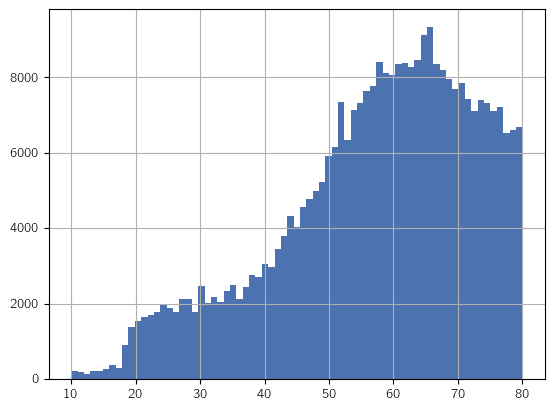

In [8]:
def plot_age(df: pd.DataFrame):
    age_sr = df.age
    bins = len(age_sr.unique())
    age_sr.hist(bins=bins, color=color[0])
    return age_sr.describe()

plot_age(df)

## Meta-sets

In [9]:
complete_config = read_toml(join(metachest_dir, 'mtl', 'complete.toml'))
mtrn = complete_config['mtrn']
mval = complete_config['mval']
mtst = complete_config['mtst']
mclasses = [mtrn, mval, mtst]

def build_metasets_table(total_df):
    df_msets = total_df[mtrn + mval + mtst].T
    mset_vals = ['mtrn'] * len(mtrn) + ['mval'] * len(mval) + ['mtst'] * len(mtst)
    df_msets.insert(0, 'mset', mset_vals)

    df_msets_lst = []
    for mset_name in ['mtrn', 'mval', 'mtst']:
        df_mset = df_msets[df_msets['mset'] == mset_name]
        df_mset = df_mset.drop(columns=['mset'])
        df_mset.loc['total', :] = df_mset.sum(axis=0)
        sr_mset = pd.Series([0] * 5, index=df_mset.columns, name=mset_name)
        df_mset = pd.concat([sr_mset.to_frame().T, df_mset], axis=0)
        df_msets_lst.append(df_mset)
    df_msets = pd.concat(df_msets_lst).astype(int)

    return df_msets

build_metasets_table(total_df)[cols_order].rename(index=keywords, columns=keywords).replace(0, '').style.format(thousands=',')

dataset,MetaChest,CheXpert,MIMIC,ChestX-ray14,PadChest
Meta-Train,,,,,
Effusion,"128,189","66,484","43,544","13,086","5,075"
Lung opacity,"119,973","77,194","42,779",,
Atelectasis,"80,420","25,980","38,297","11,335","4,808"
Infiltration,"29,817",,,"19,362","10,455"
Nodule,"9,667",,,"6,238","3,429"
Mass,"6,420",,,"5,682",738
Pleural thickening,"6,017",,,"3,326","2,691"
Total,"380,503","169,658","124,620","59,029","27,196"
Meta-Validation,,,,,


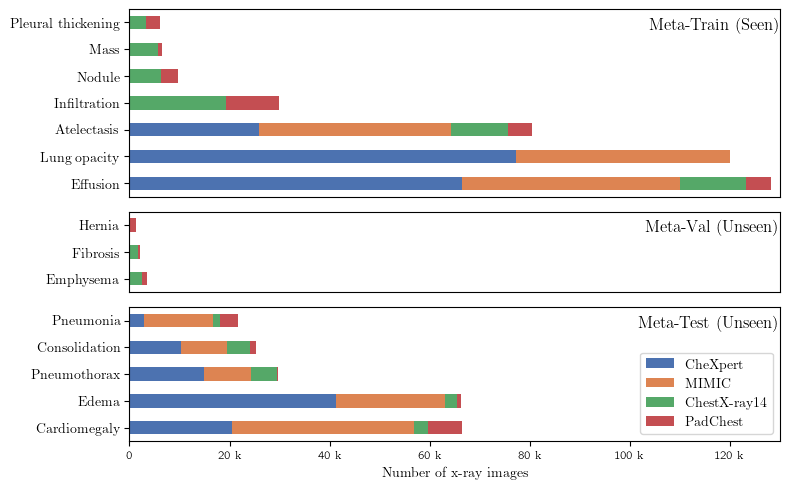

In [10]:

def plot_metasets(ds, mclasses, figsize=(8, 5)):
    titles = ['Meta-Train (Seen) ', 'Meta-Val (Unseen) ', 'Meta-Test (Unseen) ']
    _, axs = plt.subplots(
        nrows=len(mclasses), ncols=1, tight_layout=True,
        gridspec_kw={'height_ratios': [len(mset) for mset in mclasses]},
        figsize=figsize
    )
    for mset, title, ax in zip(mclasses, titles, axs):
        ds_mset = ds[mset]
        ds_mset = ds_mset.rename(columns=keywords, index=keywords)
        ds_mset.T.plot.barh(stacked=True, ax=ax, color=color)

        ax.set_title(title, fontsize='large', loc='right', y=1.0, pad=-14)
        ax.set_xlim(0, 130000)
        if 'Test' in title:
            ax.xaxis.set_tick_params(labelsize='small')
            ax.xaxis.set_major_formatter(EngFormatter())
            ax.set_xlabel('Number of x-ray images')
            ax.legend(loc='lower right', fontsize='medium')
        else:
            ax.set_xticks([],[])
            ax.get_legend().remove()
        ax.tick_params(axis='y', which='major', labelsize='medium')

        plt.tight_layout()
        plt.savefig(join(plot_dir, 'metachest_metasets.pdf'))
        plt.savefig(join(plot_dir, 'metachest_metasets.jpg'))

plot_metasets(ds_sum_df, mclasses)